Nama : Fadhil Dzikri Aqila

Kelas : TK-45-G09

NIM : 1103213136

# Praktikum 1: Ekstraksi Garis dengan Hough Transform

Tujuan: Mempelajari cara mendeteksi garis dari gambar menggunakan Hough Transform.

Saving image1.jpg to image1.jpg


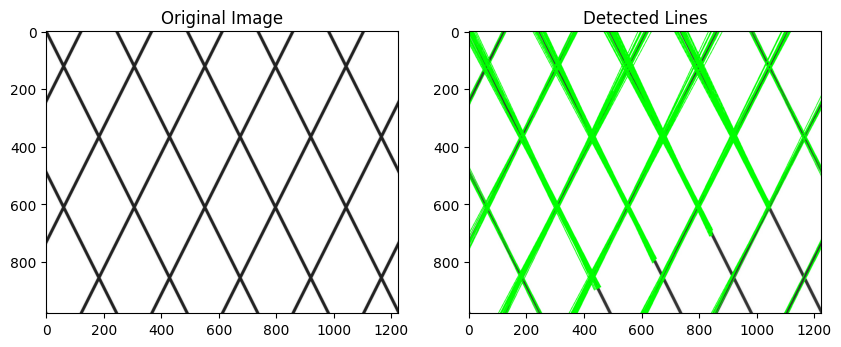

In [3]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, 50, 150)

# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

# Gambar garis pada gambar asli
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Lines")
plt.show()

Hasil Analisis Output:

Hasil deteksi garis menggunakan algoritma Hough Transform menunjukkan keberhasilan dalam mengidentifikasi garis-garis diagonal pada gambar asli. Gambar hasil (kanan) menunjukkan garis-garis hijau yang mewakili posisi dan orientasi garis yang terdeteksi, sebagian besar sesuai dengan pola garis hitam pada gambar asli (kiri). Proses ini melibatkan deteksi tepi menggunakan algoritma Canny, diikuti oleh identifikasi garis berdasarkan parameter jarak dan sudut pada Hough Transform. Meskipun sebagian besar garis berhasil terdeteksi dengan baik, terdapat beberapa garis tambahan yang muncul akibat sensitivitas parameter threshold. Untuk aplikasi yang membutuhkan akurasi lebih tinggi, penyesuaian parameter seperti ambang batas pada Canny dan akumulasi pada Hough Transform dapat meningkatkan presisi hasil deteksi. Output ini menunjukkan potensi metode ini dalam mendeteksi pola linear pada gambar untuk berbagai aplikasi visi komputer.

# Praktikum 2: Template Matching untuk Deteksi Objek

Tujuan: Mengenali objek di dalam gambar menggunakan Template Matching.

Upload main image:


Saving image2.jpg to image2.jpg
Upload template image:


Saving image2_template.jpg to image2_template.jpg


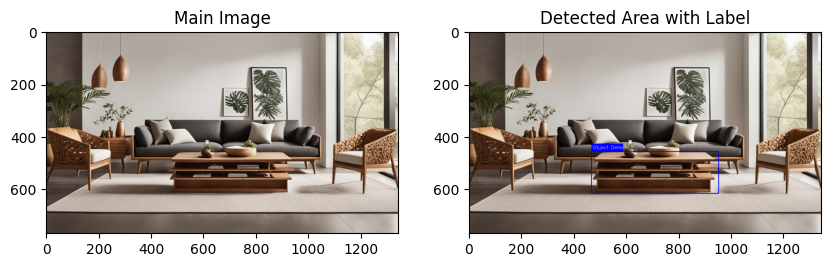

In [4]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk memeriksa apakah template lebih kecil dari gambar utama
def validate_template_size(main_image, template):
    if template.shape[0] > main_image.shape[0] or template.shape[1] > main_image.shape[1]:
        raise ValueError("Template size must be smaller than the main image size!")

try:
    # Unggah gambar utama
    print("Upload main image:")
    main_image_file = files.upload()
    main_image_filename = list(main_image_file.keys())[0]

    # Unggah template
    print("Upload template image:")
    template_file = files.upload()
    template_filename = list(template_file.keys())[0]

    # Load gambar utama dan template
    main_image = cv2.imread(main_image_filename)  # Gambar berwarna
    template = cv2.imread(template_filename, cv2.IMREAD_GRAYSCALE)  # Template tetap grayscale

    # Validasi ukuran template
    validate_template_size(main_image, template)

    # Konversi gambar utama ke grayscale untuk template matching
    main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

    # Lakukan Template Matching
    result = cv2.matchTemplate(main_image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Gambar kotak di sekitar area yang terdeteksi
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Salin gambar untuk output dan tambahkan kotak dan label
    output = main_image.copy()
    cv2.rectangle(output, top_left, bottom_right, (255, 0, 0), 2)  # Kotak biru
    # Tambahkan kotak label di atas kotak deteksi
    label_top_left = (top_left[0], top_left[1] - 30)
    label_bottom_right = (top_left[0] + 120, top_left[1])
    cv2.rectangle(output, label_top_left, label_bottom_right, (255, 0, 0), -1)  # Kotak biru solid untuk label
    cv2.putText(output, "Object Detected", (top_left[0] + 5, top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)  # Teks putih di atas kotak label

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), plt.title("Main Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Area with Label")
    plt.show()

except ValueError as ve:
    print("Error:", ve)
except Exception as e:
    print("An unexpected error occurred:", e)

Hasil Analisis Output:

Pada output hasil template matching, gambar utama menampilkan keseluruhan objek dalam ruangan, sedangkan gambar dengan deteksi area menunjukkan area yang sesuai dengan template. Deteksi dilakukan menggunakan metode Template Matching dengan algoritma cv2.TM_CCOEFF_NORMED, yang mencari kecocokan terbaik berdasarkan nilai korelasi. Area yang terdeteksi diberi kotak biru untuk menyoroti lokasi objek sesuai template dan dilengkapi label "Object Detected" di atasnya untuk memberikan indikasi visual yang jelas. Deteksi ini menunjukkan presisi pencocokan antara template dengan gambar utama, yang berhasil diidentifikasi dengan posisi serta dimensi akurat berdasarkan perbandingan grayscale pada kedua gambar. Hasil ini dapat digunakan untuk analisis objek dalam aplikasi seperti deteksi objek otomatis atau klasifikasi gambar.

# Praktikum 3: Pembuatan Pyramid Gambar

Tujuan: Memahami cara membuat Gaussian Pyramid untuk memproses gambar pada berbagai skala.

Saving image3.jpg to image3.jpg


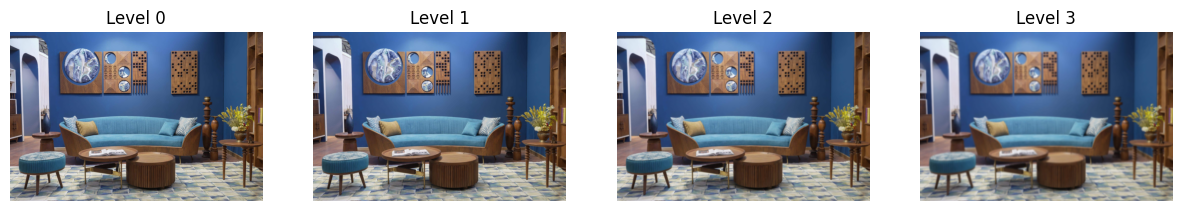

In [5]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)

# Buat Gaussian Pyramid
pyramid = [image]
for i in range(3):  # Buat 3 level pyramid
    image = cv2.pyrDown(image)
    pyramid.append(image)

# Tampilkan setiap level
plt.figure(figsize=(15, 5))
for level, img in enumerate(pyramid):
    plt.subplot(1, len(pyramid), level + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Level {level}')
    plt.axis('off')

plt.show()

Hasil Analisis Output:

Pada output Gaussian Pyramid, setiap level menunjukkan gambar dengan resolusi yang semakin rendah melalui proses downsampling. Gambar Level 0 adalah resolusi asli, sedangkan Level 1, Level 2, dan Level 3 adalah hasil pengurangan resolusi berturut-turut menggunakan fungsi cv2.pyrDown. Penurunan resolusi ini menghasilkan hilangnya beberapa detail visual, terutama pada bagian kecil atau tekstur halus, karena penggabungan piksel yang bertetangga untuk merepresentasikan gambar pada ukuran yang lebih kecil. Teknik ini berguna dalam berbagai aplikasi seperti analisis multi-resolusi, deteksi fitur pada skala berbeda, dan optimisasi komputasi dalam pemrosesan citra. Gaussian Pyramid memberikan pendekatan efektif untuk memproses gambar secara hierarkis tanpa kehilangan struktur utama dari konten visual.

# Praktikum 4: Deteksi Lingkaran Menggunakan Hough Transform

Tujuan: Memahami cara mendeteksi lingkaran di dalam gambar menggunakan metode Hough Transform.

Saving image4.png to image4.png


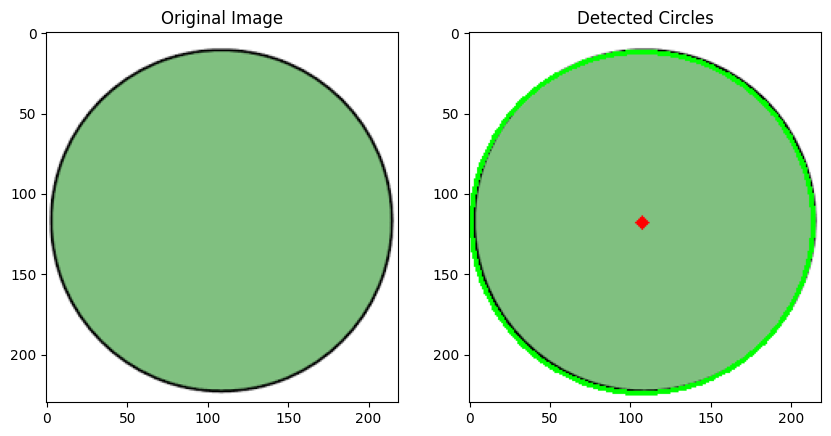

In [8]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi lingkaran menggunakan Hough Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,  # Pastikan jarak antar lingkaran lebih besar
    param1=100,  # Threshold untuk Canny edge detection
    param2=50,   # Sensitivitas deteksi (naikkan jika terlalu banyak deteksi)
    minRadius=50,  # Ukuran radius minimal bola
    maxRadius=150  # Ukuran radius maksimal bola
)

# Gambar lingkaran yang terdeteksi pada gambar asli
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Koordinat pusat lingkaran
        radius = circle[2]  # Radius lingkaran
        cv2.circle(output, center, radius, (0, 255, 0), 2)  # Gambar lingkaran
        cv2.circle(output, center, 2, (0, 0, 255), 3)  # Gambar pusat lingkaran

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Circles")
plt.show()

Hasil Analisis Output:

Pada output deteksi lingkaran menggunakan metode Hough Transform, gambar asli ditampilkan di sisi kiri, sedangkan gambar dengan lingkaran yang terdeteksi ditampilkan di sisi kanan. Algoritma ini berhasil mendeteksi lingkaran dengan menggambarkan batas lingkaran menggunakan garis hijau dan menandai pusat lingkaran dengan titik merah. Proses ini menggunakan parameter seperti sensitivitas deteksi, jarak antar lingkaran, serta radius minimum dan maksimum untuk memastikan deteksi yang akurat sesuai spesifikasi lingkaran dalam gambar. Teknik ini sangat efektif untuk mendeteksi bentuk lingkaran dalam aplikasi seperti pengolahan citra medis, pengenalan objek, atau analisis geometris dalam citra. Hasilnya menunjukkan bahwa algoritma bekerja dengan baik, menangkap lingkaran utama secara presisi.

# Praktikum 5: Ekstraksi Warna Dominan pada Gambar

Tujuan: Memahami cara mengekstraksi warna dominan dari sebuah gambar menggunakan K-Means Clustering.

Saving image5.jpg to image5.jpg


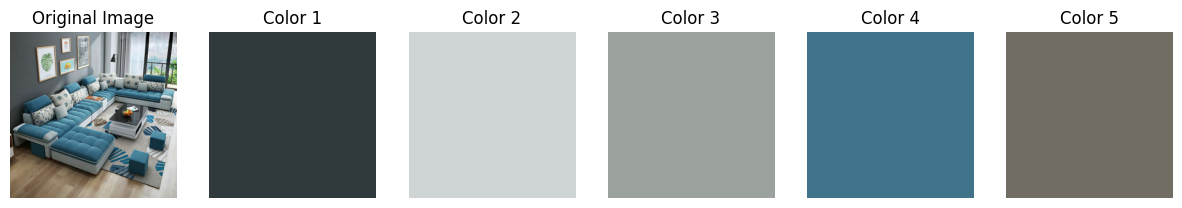

In [6]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke format RGB
reshaped_image = image.reshape((-1, 3))  # Ubah menjadi array 2D (pixel x warna)

# K-Means Clustering untuk menemukan warna dominan
k = 5  # Jumlah cluster warna
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reshaped_image)

# Ekstrak warna dominan
dominant_colors = kmeans.cluster_centers_
dominant_colors = np.uint8(dominant_colors)

# Tampilkan gambar asli
plt.figure(figsize=(15, 5))

plt.subplot(1, k + 1, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")

# Tampilkan warna dominan
for i, color in enumerate(dominant_colors):
    plt.subplot(1, k + 1, i + 2)
    plt.imshow([[color / 255]])  # Normalisasi ke rentang 0-1 untuk plt
    plt.axis('off')
    plt.title(f"Color {i+1}")

plt.show()

Hasil Analisis Output:

Pada output analisis warna, gambar asli ditampilkan di sebelah kiri, diikuti oleh lima warna dominan yang berhasil diekstraksi menggunakan algoritma K-Means Clustering dengan jumlah cluster sebanyak 5. Warna dominan tersebut merepresentasikan palet warna utama dalam gambar, masing-masing diidentifikasi sebagai representasi visual dari kelompok piksel dengan karakteristik warna serupa. Teknik ini efektif untuk menganalisis estetika visual, pengelompokan warna untuk desain interior, atau pembuatan palet warna otomatis untuk aplikasi grafis. Warna-warna yang dihasilkan menggambarkan suasana ruang yang dominan, misalnya warna abu-abu, biru, dan netral yang memberikan kesan modern dan tenang. Pendekatan ini menunjukkan bagaimana K-Means dapat digunakan untuk ekstraksi warna secara cepat dan efisien.

# Praktikum 6: Deteksi Kontur pada Gambar

Tujuan: Memahami cara mendeteksi dan menggambar kontur objek pada gambar menggunakan OpenCV.

Saving image6.jpg to image6 (3).jpg


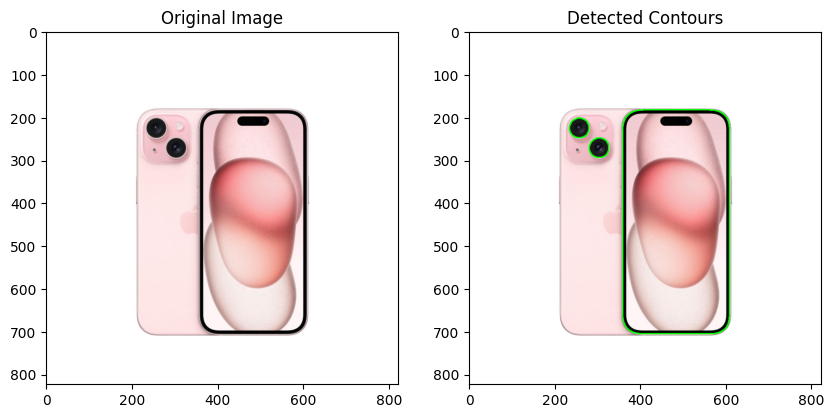

In [12]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive Threshold untuk pencahayaan tidak merata
threshold = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(threshold, 50, 150)

# Temukan kontur
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter kontur besar berdasarkan area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Fokus pada objek besar

# Periksa apakah kontur ditemukan
if len(filtered_contours) > 0:
    # Gambar kontur pada gambar asli
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Contours")
    plt.show()
else:
    print("No contours detected. Try adjusting the threshold or area filter parameters.")

Hasil Analisis Output:

Pada hasil analisis kontur, gambar asli ditampilkan di sisi kiri, sedangkan gambar dengan kontur terdeteksi ditampilkan di sisi kanan. Proses dimulai dengan mengurangi noise menggunakan Gaussian Blur, diikuti dengan penerapan Adaptive Threshold untuk menangani variasi pencahayaan, dan deteksi tepi dengan algoritma Canny. Kontur yang terdeteksi kemudian difilter berdasarkan area untuk memastikan hanya objek besar yang diperhatikan. Kontur objek utama berhasil diidentifikasi, seperti pada bagian tepi perangkat, dan ditampilkan dengan garis hijau pada gambar hasil. Teknik ini sangat berguna dalam aplikasi seperti deteksi objek, segmentasi citra, atau analisis bentuk, dengan hasil yang menunjukkan kemampuan metode ini untuk menangkap detail struktural objek yang signifikan.